Script 1. Load and explore the data.

In [1]:
import pandas as pd
from scipy.stats import iqr, differential_entropy
# interquartile range:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html
# entropy:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.differential_entropy.html

import matplotlib.pyplot as plt
%matplotlib inline

from target_to_binary import is_seizure

In [2]:
file_path  = '../dat/Epileptic_Seizure_Recognition.csv'
data = pd.read_csv(file_path)
print(data.shape)  # (11500, 180)
del file_path

# remove the 1st column (Unnamed)
data.drop(columns=[list(data)[0]], inplace=True)

data.head()

(11500, 180)


X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

In [3]:
# group all classes >1 (healthy) together into new class 0
target = list(data)[-1]
# print(target)  # "y"

features = list(data)[0:-1]
# print(len(features))  # 178

data[target] = data[target].apply(is_seizure)

data.head()
# As expected, the classes 4,5 are replaced by zero.  

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  0  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  0  
3   -77   -85   -77   -72   -69   -65  0  
4   -32   -41   -65   -83   -89   -73  0  

[5 rows x 179 columns]

In [4]:
# the distribution of the target variable
data['y'].value_counts()

# 0    9200
# 1    2300

# 4 times more healthy signals, than epileptic. 

y
0    9200
1    2300
Name: count, dtype: int64

In [5]:
# Check for missing values.

# data.isnull().sum() : all visible results are zeros

data.isnull().sum().sum()  # 0
# No missing values in this dataset.


0

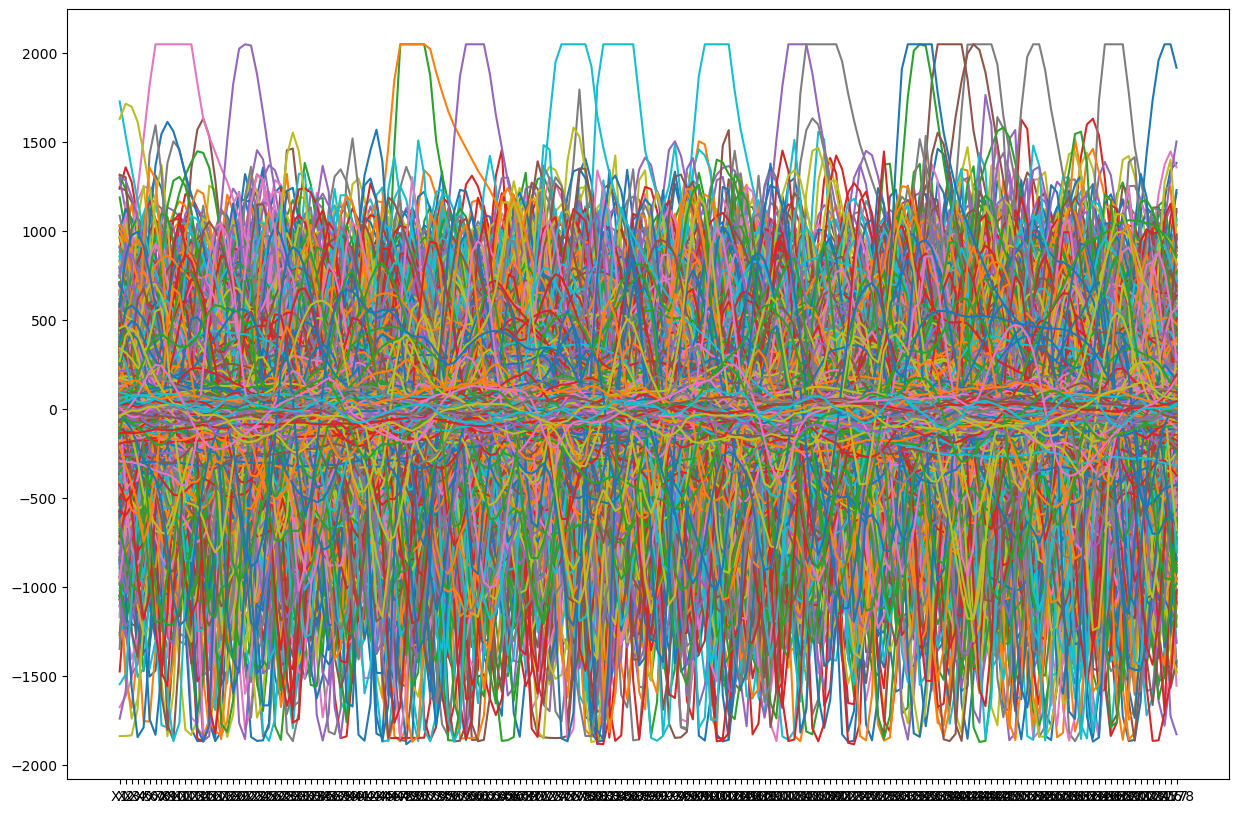

In [6]:
# plot all signals together. The result is saved to '../res/all_signals.png'
plt.figure(figsize=(15, 10))
all_plots = plt.plot(data[features].T)
plt.show()

# print(type(all_plots))  # list
# print(len(all_plots))   # 11500, equal to the nb of samples

# dense btw -1500 and +1300, but only near 20 lines reach above 1700, they plateau at 2000 (bound of the measuring device?).

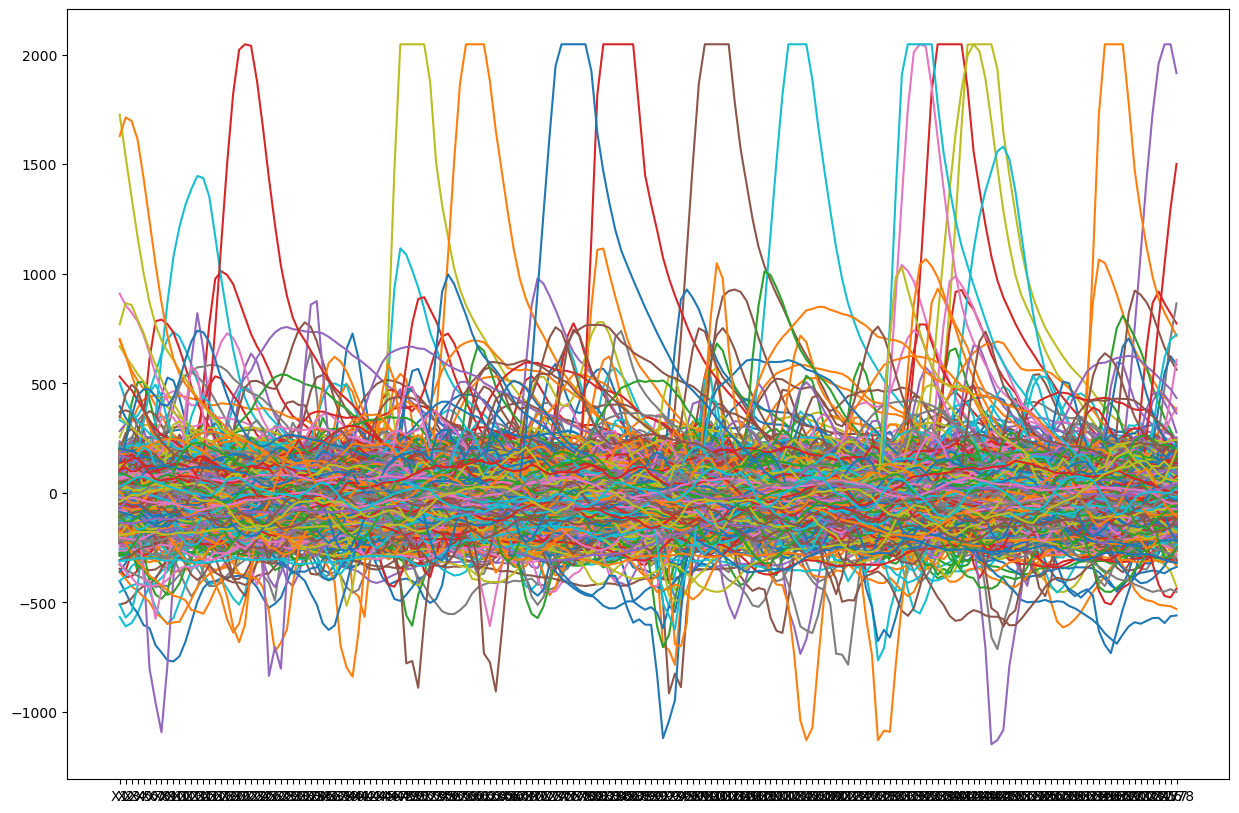

<class 'list'>
9200


In [7]:
# plot the signals from each class together: Healthy. The result is saved to '../res/healthy_signals.png'

def select_class(in_class): 
    return data[features].loc[data[target] == in_class]


def y_to_plot_same_fig(in_class):
    """ 
    Plots all signals of a certain type 'in_class' 
    in the same figure.
    
    Args: number of the class to plot (int equal 0 or 1).
    
    Returns:
        list of Line2D: the signals.
    """
    plt.figure(figsize=(15, 10))
    plotted_lines = plt.plot(select_class(in_class).T)
    plt.show()
    return plotted_lines



plots_healthy = y_to_plot_same_fig(0)

# print(type(plots_healthy))  # list
# print(len(plots_healthy))   # 9200 (equal to the nh of healthy samples)

# Dense from y= -300 to y = 300 (approximately).
# approximately 15 signals reach +2000, but none is lower than -1000

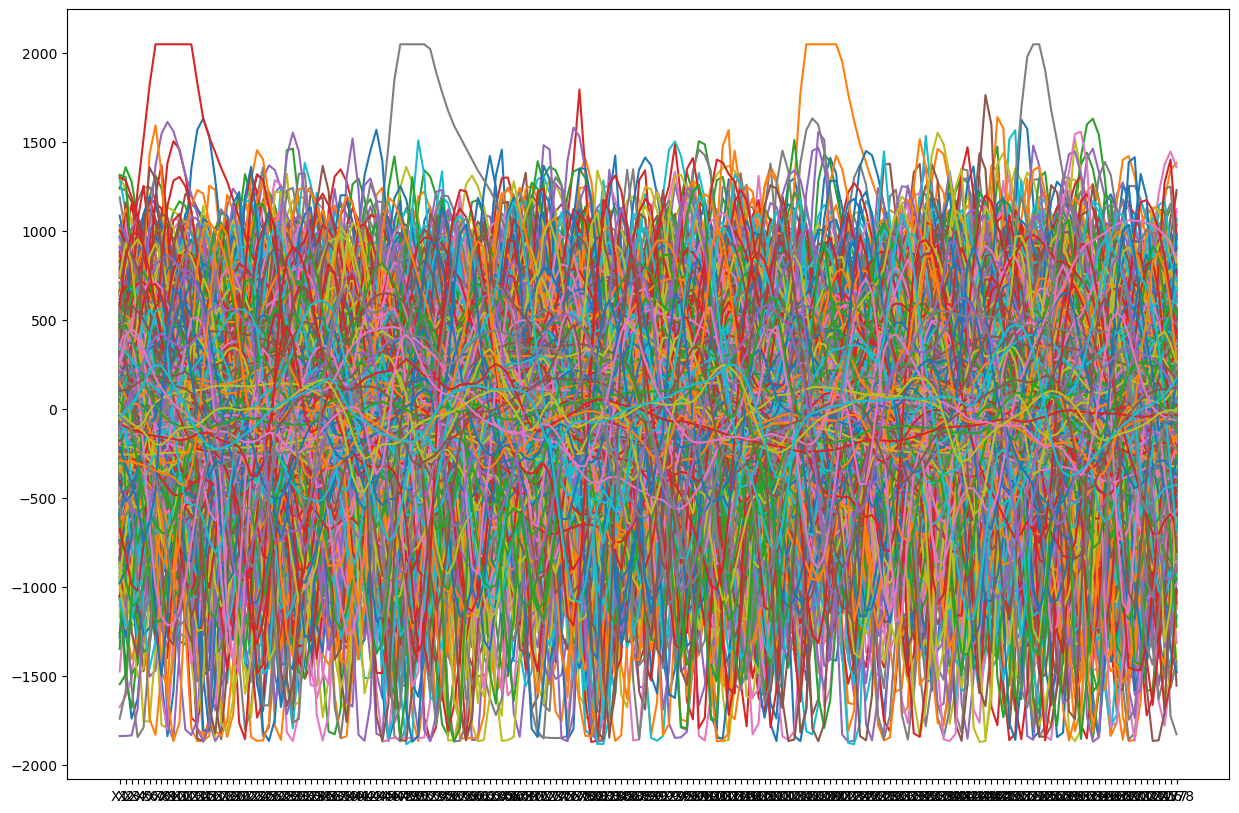

In [8]:
# plot the signals from each class together: seizure.  The result is saved to '../res/seizure_signals.png'

plots_seizure = y_to_plot_same_fig(1)

# print(type(plots_seizure))  # list
# print(len(plots_seizure))   # 9200 (equal to the nh of healthy samples)


# dense from -1800 to +1400 .


According to these results, some statistics relative to the amplitude of values of individual signals may lead to some nontrivial insight. IQR and entropy are computed and plotted (as histograms).

In [9]:
feat_healthy = select_class(0)

print(type(feat_healthy))  # DataFrame
print(feat_healthy.shape)  # (9200, 178)

feat_seizure = select_class(1)
print(feat_seizure.shape)  # ( 2300 , 178)

<class 'pandas.core.frame.DataFrame'>
(9200, 178)
(2300, 178)


(9200,)
(2300,)


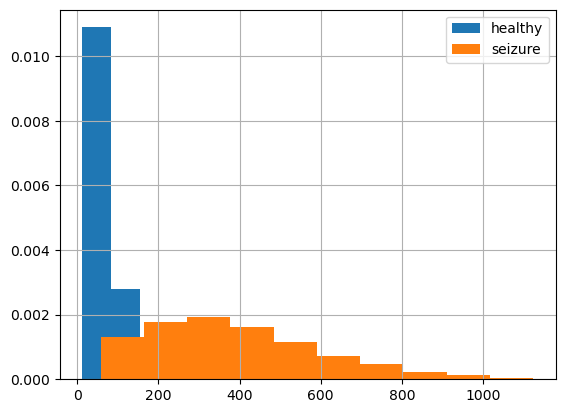

In [10]:
# interquartile range: arrays, histos

# For healthy signals
iqr_healthy =  feat_healthy.apply(iqr, axis=1)
# print(type(iqr_healthy))  # pandas.core.series.Series
print(iqr_healthy.shape)  # (9200,)


# For seizures
iqr_seizures =  feat_seizure.apply(iqr, axis=1)
# print(type(iqr_seizures))  # pandas.core.series.Series
print(iqr_seizures.shape)  # (2300,)

# histograms for both classes on a single plot. 
fig,ax = plt.subplots()
iqr_healthy.hist(ax=ax,density=True, label='healthy') # only 2 bins
iqr_seizures.hist(ax=ax,density=True, label='seizure')
ax.legend()
plt.show()


(9200,)
(2300,)


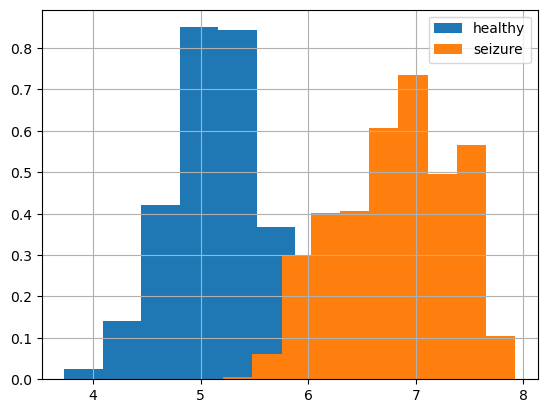

In [11]:
# differential entropy: arrays, histos

# For healthy signals
ent_healthy =  feat_healthy.apply(differential_entropy, axis=1)
print(ent_healthy.shape)  # (9200,)


# For seizures
ent_seizures =  feat_seizure.apply(differential_entropy, axis=1)
print(ent_seizures.shape)  # (2300,)

# histograms for both classes on a single plot. 
fig,ax = plt.subplots()
ent_healthy.hist(ax=ax,density=True, label='healthy')
ent_seizures.hist(ax=ax,density=True, label='seizure')
ax.legend()
plt.show()


Conclusion. IQR or differential entropy can be used as an informative features. The separation seems more clear for the case of entropy. 